<a href="https://colab.research.google.com/github/Mwadz/week-8-ip/blob/main/Week_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question Definition

a) **Objective**

To build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

a) **Success metric**

Built several models using SVM, Decision trees and Random Forest.

b) **Context**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.A normal TSH and T4 is indicative of normal functioning of the thyroid gland, a low TSH and elevated T4 indicates hyperthyroidism, a low TSH and low T4 indicates secondary hypothyroidism, and a high TSH and low T4 indicates primary hypothyroidism.

**d) Experimental Design**

The process will entail:

    i) Reading and exploring the given dataset.

    ii) Defining the appropriateness of the available data to answer the given question.

    iii) Finding and deciding what to do with outliers, anomalies, and missing data within the dataset.

    iv) Performing exploratory data analysis while recording the observations.

    v) Performing regression analysis. Incorporating categorical independent variables into the models(depending on whether necessary). 

    vi) Building the models in two parts.

    vii) Performing evaluation of the models in the data

    vii) Making a conclsion based on model analysis. 

**e) Data Relevance**
The appropriate dataset to use for this project is that which contains data with information on patients from a clinical camp held by the Nairobi Hospital. The data provided is useful and very relevant.


# Loading and Exploring the Data

In [3]:
#@title Importing Libraries
import numpy as np
import pandas as pd

In [4]:
# Loading the dataset using pandas
thyroid = pd.read_csv('http://bit.ly/hypothyroid_data')

In [5]:
# dsplaying the shape and viewing the dataset
print(thyroid.shape)
thyroid.head(3)

(3163, 26)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?


In [6]:
# checking datatypes
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

* all types are set to object. We'll have to convert the numerical columns to int

In [7]:
# checking out the column names
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [8]:
# checking out possible classes in the status column(possible y)
thyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

# Cleaning the Data

In [9]:
# the last four columns should be converted to numerical columns
# converting all the '?' to null values
thy_clean =thyroid.copy(deep=True)

thy_clean.replace({"?": None}, inplace= True)
# checking for null values
thy_clean.isna().sum()
# converting the datatypes to more appropriate ones
thy_clean.age = pd.to_numeric(thy_clean.age)
thy_clean.TSH = pd.to_numeric(thy_clean.TSH)
thy_clean.TT4 = pd.to_numeric(thy_clean.TT4)
thy_clean.T4U = pd.to_numeric(thy_clean.T4U)
thy_clean.FTI = pd.to_numeric(thy_clean.FTI)

thy_clean.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                            object
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

* dropping rows with null values seems to be the best option since the records are medical and accuracy is of atmost importance

In [10]:
thy_clean.dropna(inplace=True)

In [11]:
# checking for duplictes
thy_clean.duplicated().sum()

0

In [12]:
# dropping the duplicates
thy_clean.drop_duplicates(keep=False, inplace=True)
# confirming
thy_clean.duplicated().sum()

0

# Exploratory Data Analysis

## Decriptive Statitics

In [13]:
thyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


In [14]:
# making a duplicate of the thyroid df
thy =thyroid.copy(deep=True)

In [15]:
#defining a function to change datatypes
def dt(df, col, dtype):
  df[col]=df[col].astype(dtype)

# making a list of columns we want to flip
l = [thy.columns]

for i in l:
  dt(thy, i, 'category')

In [16]:
# importing label encoding library
from sklearn.preprocessing import LabelEncoder
LabelEncoder =LabelEncoder()

#defining a function to encode data
def enc(df, col):
  df[col]=LabelEncoder.fit_transform(df[col])


# making a list of columns we want to flip
l = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']

for i in l:
  enc(thy, i)

In [17]:
thy.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,67,2,0,0,0,0,0,0,0,...,1,7,1,55,1,116,1,2,0,52
1,hypothyroid,6,1,1,0,0,0,0,0,0,...,1,18,1,99,1,81,1,79,0,52


* now we have a label encoded df named thy

In [18]:
# checking the decriptive statistics once more
thy.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,...,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,50.978501,1.263990,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,...,0.780272,31.306355,0.921277,139.273475,0.921593,73.073348,0.921910,131.981663,0.082200,49.456529
std,25.400502,0.490443,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,...,0.414128,21.727338,0.269348,107.492721,0.268853,32.589482,0.268356,113.336785,0.274713,8.984891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,16.000000,1.000000,26.000000,1.000000,54.000000,1.000000,22.500000,0.000000,52.000000
50%,51.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,23.000000,1.000000,136.000000,1.000000,66.000000,1.000000,80.000000,0.000000,52.000000
75%,69.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,41.000000,1.000000,250.000000,1.000000,79.000000,1.000000,264.000000,0.000000,52.000000
max,92.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,69.000000,1.000000,268.000000,1.000000,158.000000,1.000000,280.000000,1.000000,52.000000


## Univariate Analysis

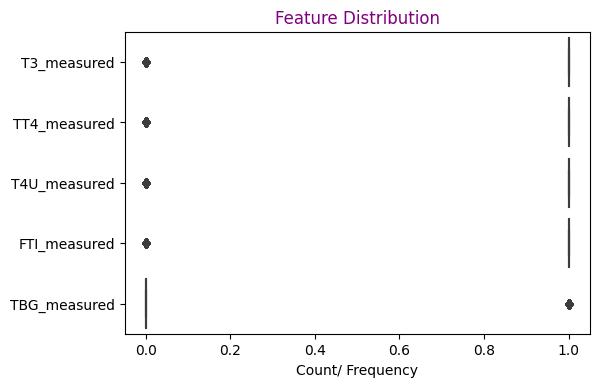

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking for outliers
col = thy[['T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured',]]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Feature Distribution', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

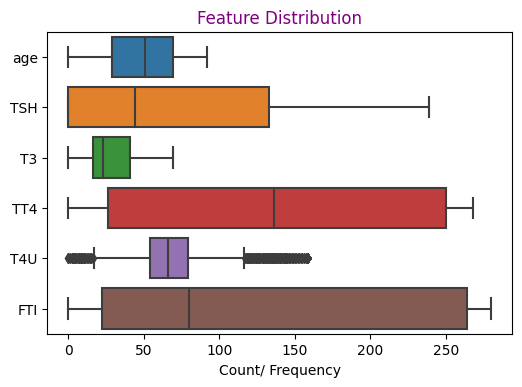

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking for outliers
col = thy[['age', 'TSH',  'T3', 'TT4', 'T4U', 'FTI']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Feature Distribution', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

* T4U has alot of ourliers which are helpful since we're tryinng to find out which levels of T4U are assoiated with hypothyroidism

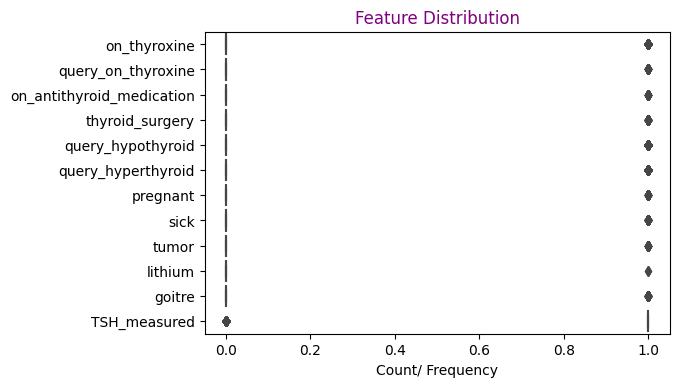

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking for outliers
col = thy[['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Feature Distribution', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()



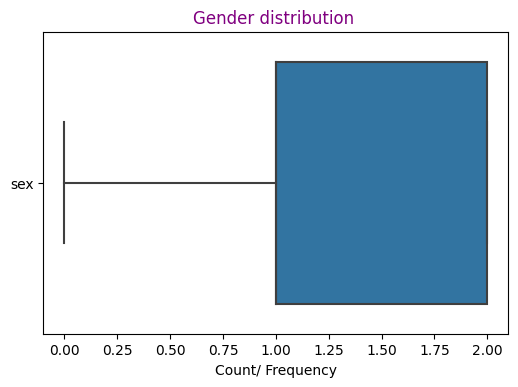

In [22]:
# checking the ditribution of price
col = thy[['sex']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Gender distribution ', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

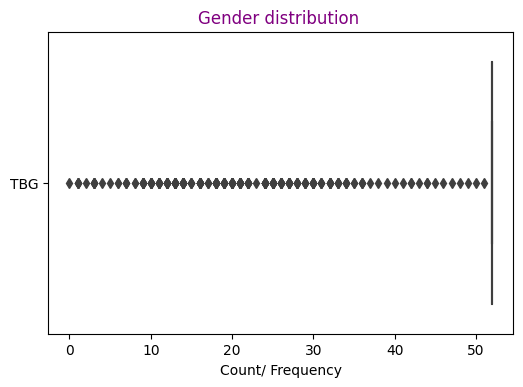

In [23]:
# checking the ditribution of price
col = thy[['TBG']]
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = col, orient="h")
plt.title('Gender distribution ', color = 'Purple')
plt.xlabel('Count/ Frequency')
plt.show()

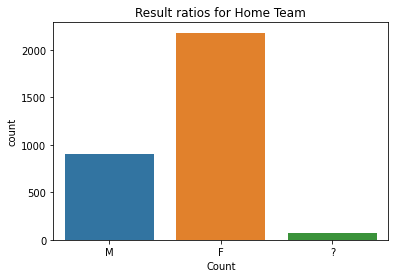

In [24]:
%matplotlib inline
sns.countplot(data=thyroid, x='sex')
plt.title("Result ratios for Home Team")
plt.xlabel("Count")
plt.show()

* Females are alot more than males and we hane a small percentage of records with unknown gender

In [25]:
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [26]:
thyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

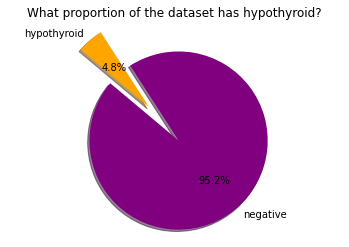

In [27]:
# finding out what proportion of our dataset has hypothyroid 
plt.pie(thyroid['status'].value_counts(normalize=True), labels =thyroid['status'].value_counts().index,colors = ['purple', 'orange'], autopct = '%1.1f%%', explode = [0.5,0], shadow = True, startangle = 140)
plt.axis('equal')
plt.title('What proportion of the dataset has hypothyroid?')
plt.show()

* The percentage of patients in our datset that ha hypothyroidism is 4.8%
* We'll have to stratify using the status column so we have equal samples from both positive and negative cases  

In [28]:
# creating new dataframe with only female records 
fem = thyroid[(thyroid['sex'] == 'F')]

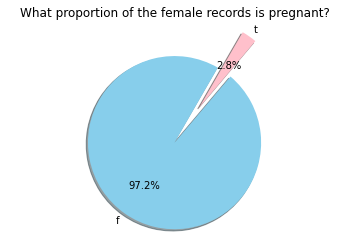

In [29]:
# finding out what proportion of our dataset is pregnant 
plt.pie(fem['pregnant'].value_counts(normalize=True), labels =fem['pregnant'].value_counts().index,colors = ['skyblue', 'pink'], autopct = '%1.1f%%', shadow = True, explode = [0,0.5], startangle = 60)
plt.axis('equal')
plt.title('What proportion of the female records is pregnant?')
plt.show()

* a very small percentage of 2.8% of the female proportion is pregnant 
* this is relevant because high TBG levels are normally associated with pregnancy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


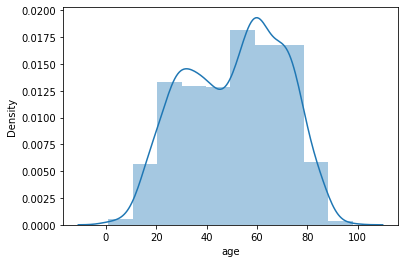

In [30]:
# Ditribution plot for age
thyroid['age'] = pd. to_numeric(thyroid['age'], errors='coerce') 

sns.distplot(thyroid['age'], bins=10) 

## Bivariate Anaysis

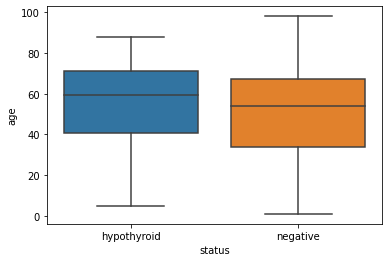

In [31]:
sns.boxplot(x='status', y='age', data=thyroid);


* hypothyroidism occurs mostly in individuals of age 40-70 according to our dataset


<Figure size 2000x1200 with 0 Axes>

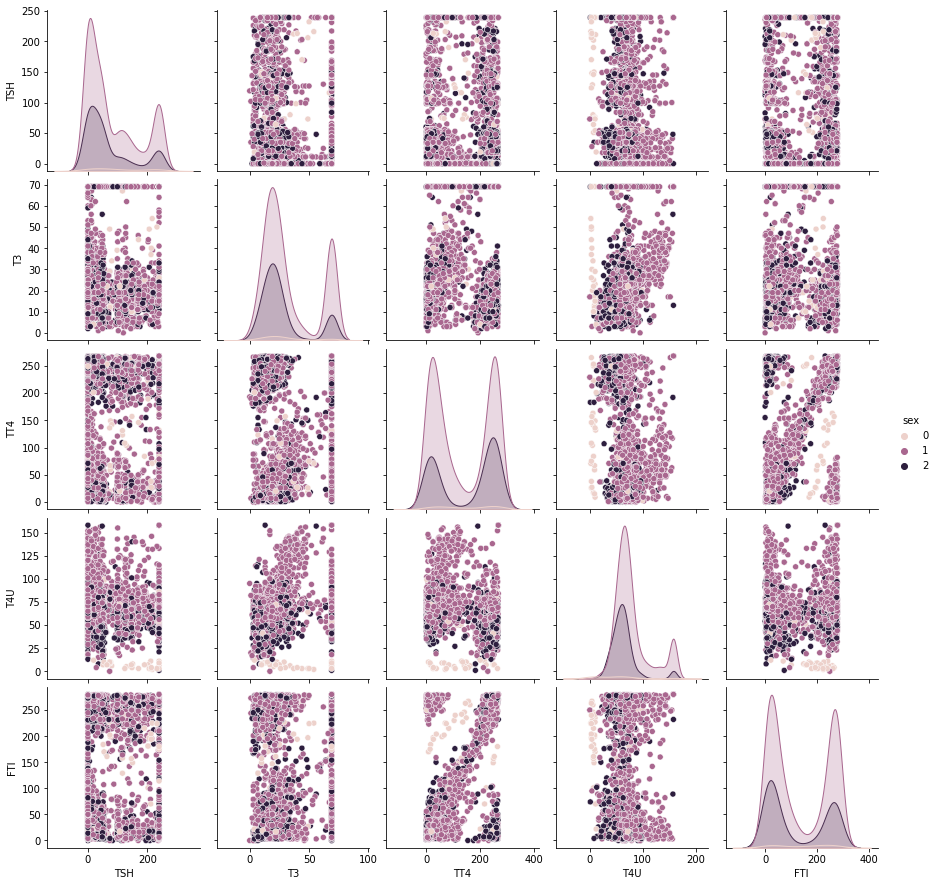

In [32]:
# Constructing pair plots
plt.figure(dpi= 80,figsize=(25,15))
sns.pairplot(thy[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex']], kind="scatter", hue="sex")
plt.show()

In [33]:
# Installing heatmapz
!pip install heatmapz

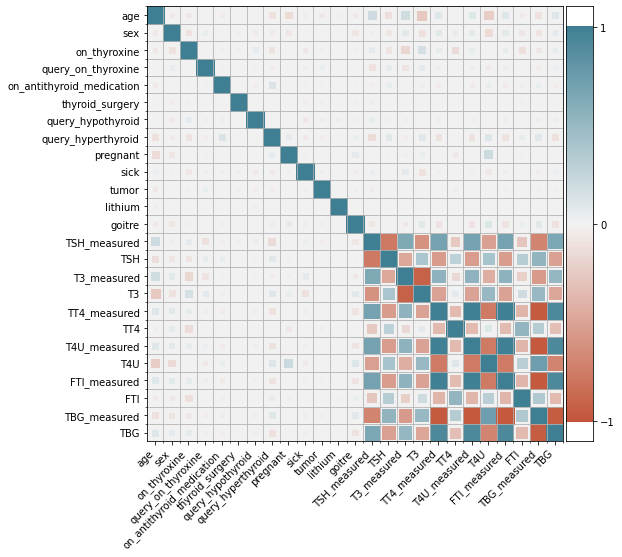

In [34]:
# Importing the two methods from heatmap library
from heatmap import heatmap, corrplot

# checking for correlation in the rank dataset
plt.figure(figsize=(8, 8))
corrplot(thy.corr(), size_scale=300);

**Increased TBG levels**

may be due to hypothyroidism, liver disease, and pregnancy. In cases of high TBG, more thyroid hormone will be bound, decreasing free hormone in the blood. This will lead to the increase of TSH, and more thyroid hormones will be produced.

Positive correlation to TBG:
* TSH_meaured
* T3_measured
* TT4_measured(strong)
* T4U_measured
* FTI_measured

Negative correlation to TBG:
* TBG_measured
* FTI (slight)
* T4U
* TT4(slight)
* T3
* TSH

In [35]:
# splitting dfs to those with the disorder and those without
pos = thy[(thy['status'] == 'hypothyroid')]
neg = thy[(thy['status'] == 'negative')]



In [36]:
neg.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
151,negative,11,1,0,0,0,0,0,0,0,...,1,19,1,229,1,67,1,233,0,52
152,negative,67,2,0,0,0,0,0,0,0,...,1,11,1,249,1,63,1,265,0,52
153,negative,20,1,0,0,0,0,0,0,0,...,1,27,1,249,1,61,1,268,0,52
154,negative,37,1,0,0,0,0,0,0,0,...,1,11,1,248,1,41,1,16,0,52
155,negative,58,1,0,0,0,0,0,0,0,...,1,11,1,2,1,50,1,28,0,52


In [37]:
pos.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,67,2,0,0,0,0,0,0,0,...,1,7,1,55,1,116,1,2,0,52
1,hypothyroid,6,1,1,0,0,0,0,0,0,...,1,18,1,99,1,81,1,79,0,52
2,hypothyroid,15,2,0,0,0,0,0,0,0,...,1,3,1,193,1,68,1,0,0,52
3,hypothyroid,15,1,0,0,0,0,0,0,0,...,1,5,1,219,1,72,1,220,0,52
4,hypothyroid,72,2,0,0,0,0,0,0,0,...,1,13,1,216,1,96,1,196,0,52


**What is FTI in thyroid test?**

The free T4 index (FTI) is a blood test used to diagnose thyroid disorders. T4, also called thyroxine, is a thyroid hormone. The test measures how much of it is in your blood to help determine whether your thyroid gland is underactive (hypothyroidism) or overactive (hyperthyroidism). In this case we'll focus on hypothyrodism

TSH normal values are 0.5 to 5.0 mIU/L. Pregnancy, a history of thyroid cancer, history of pituitary gland disease, and older age are some situations when TSH is optimally maintained in different range as guided by an endocrinologist. FT4 normal values are 0.7 to 1.9ng/dL.

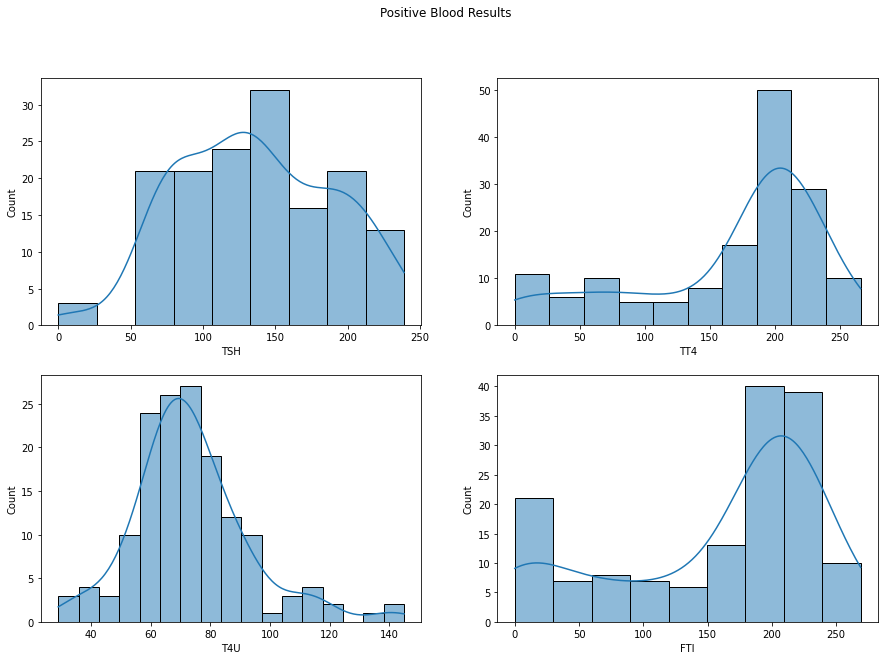

In [38]:
# checking distribution of the numerical data on the positive dataset.
fig, axes = plt.subplots(2, 2,  figsize=(15, 10))

fig.suptitle('Positive Blood Results')

sns.histplot( pos["TSH"] , ax=axes[0,0], kde= True)
sns.histplot( pos['TT4'] , ax=axes[0,1], kde= True)
sns.histplot( pos['T4U'] , ax=axes[1,0], kde= True)
sns.histplot( pos['FTI'] , ax=axes[1,1], kde= True)

plt.show()

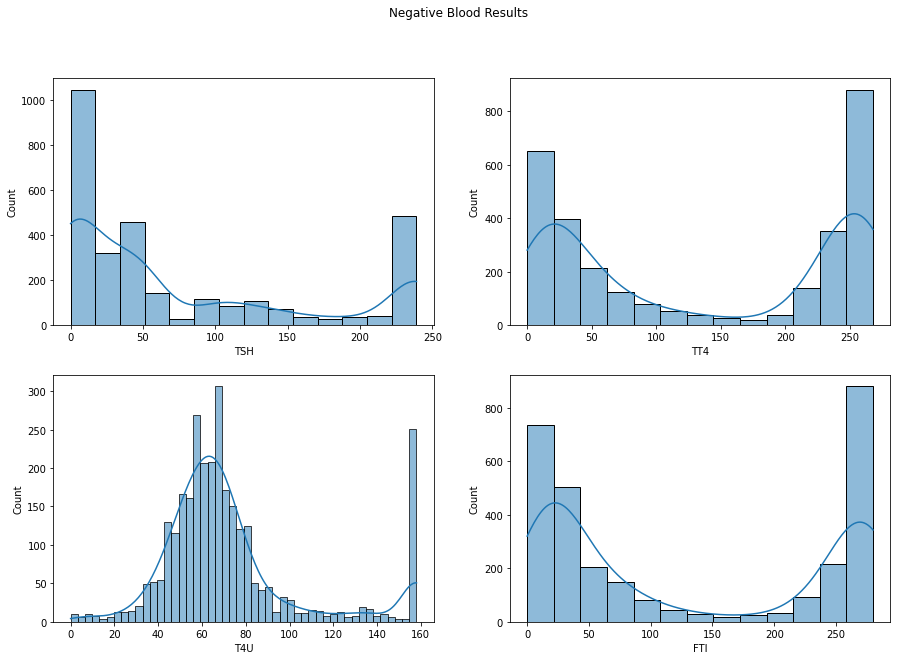

In [39]:
# checking distribution of the numerical data on the positive dataset.
fig, axes = plt.subplots(2, 2,  figsize=(15, 10))

fig.suptitle('Negative Blood Results')

sns.histplot( neg["TSH"] , ax=axes[0,0], kde= True)
sns.histplot( neg['TT4'] , ax=axes[0,1], kde= True)
sns.histplot( neg['T4U'] , ax=axes[1,0], kde= True)
sns.histplot( neg['FTI'] , ax=axes[1,1], kde= True)

plt.show()

# Modeling

In [40]:
# Importing necesary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# importing metric tools
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# redefining a function to encode data
def enc(df, col):
  df[col]=LabelEncoder.fit_transform(df[col])

In [41]:
thy['status'] = thy['status'].replace('hypothyroid', 1)
thy['status'] = thy['status'].replace('negative', 0)
thy['status'] = thy['status'].astype('int64')

In [42]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   status                     3163 non-null   int64
 1   age                        3163 non-null   int64
 2   sex                        3163 non-null   int64
 3   on_thyroxine               3163 non-null   int64
 4   query_on_thyroxine         3163 non-null   int64
 5   on_antithyroid_medication  3163 non-null   int64
 6   thyroid_surgery            3163 non-null   int64
 7   query_hypothyroid          3163 non-null   int64
 8   query_hyperthyroid         3163 non-null   int64
 9   pregnant                   3163 non-null   int64
 10  sick                       3163 non-null   int64
 11  tumor                      3163 non-null   int64
 12  lithium                    3163 non-null   int64
 13  goitre                     3163 non-null   int64
 14  TSH_measured            

In [43]:
thy.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,67,2,0,0,0,0,0,0,0,...,1,7,1,55,1,116,1,2,0,52
1,1,6,1,1,0,0,0,0,0,0,...,1,18,1,99,1,81,1,79,0,52
2,1,15,2,0,0,0,0,0,0,0,...,1,3,1,193,1,68,1,0,0,52


In [44]:
# assingning variables to X and y
X = thy.drop('status', 1)
y = thy.status.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [45]:
from sklearn.model_selection import train_test_split
# splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42, stratify = y)
# train_test_split(data[features], data[labels], test_size=0.20, shuffle=True,stratify=data[labels])

In [46]:
thy.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,67,2,0,0,0,0,0,0,0,...,1,7,1,55,1,116,1,2,0,52
1,1,6,1,1,0,0,0,0,0,0,...,1,18,1,99,1,81,1,79,0,52
2,1,15,2,0,0,0,0,0,0,0,...,1,3,1,193,1,68,1,0,0,52
3,1,15,1,0,0,0,0,0,0,0,...,1,5,1,219,1,72,1,220,0,52
4,1,72,2,0,0,0,0,0,0,0,...,1,13,1,216,1,96,1,196,0,52


In [47]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   status                     3163 non-null   int64
 1   age                        3163 non-null   int64
 2   sex                        3163 non-null   int64
 3   on_thyroxine               3163 non-null   int64
 4   query_on_thyroxine         3163 non-null   int64
 5   on_antithyroid_medication  3163 non-null   int64
 6   thyroid_surgery            3163 non-null   int64
 7   query_hypothyroid          3163 non-null   int64
 8   query_hyperthyroid         3163 non-null   int64
 9   pregnant                   3163 non-null   int64
 10  sick                       3163 non-null   int64
 11  tumor                      3163 non-null   int64
 12  lithium                    3163 non-null   int64
 13  goitre                     3163 non-null   int64
 14  TSH_measured            

In [48]:
# basing model on linear regression
from sklearn.linear_model import LinearRegression
# creating the model
linreg = LinearRegression()

# fitting
linreg = linreg.fit(X_train, y_train)

# making predictions
y_pred_bm = linreg.predict(X_test)

In [49]:
# importing evaluation tools
from sklearn import metrics

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_bm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_bm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_bm)))

Mean Absolute Error: 0.10042327425943824
Mean Squared Error: 0.03746926309258789
Root Mean Squared Error: 0.19356978868766658


In [50]:
# Import the model
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

In [51]:
# Making predictions
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.047418,0.048772
std,0.212644,0.143693
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.023518
max,1.000000,0.983779


In [52]:
# evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.051210198623256424
Mean Squared Error: 0.02544311752410235
Root Mean Squared Error: 0.15950898885047937


In [53]:
import six
import sys
from six import StringIO
sys.modules['sklearn.externals.six'] = six

## Random Forest

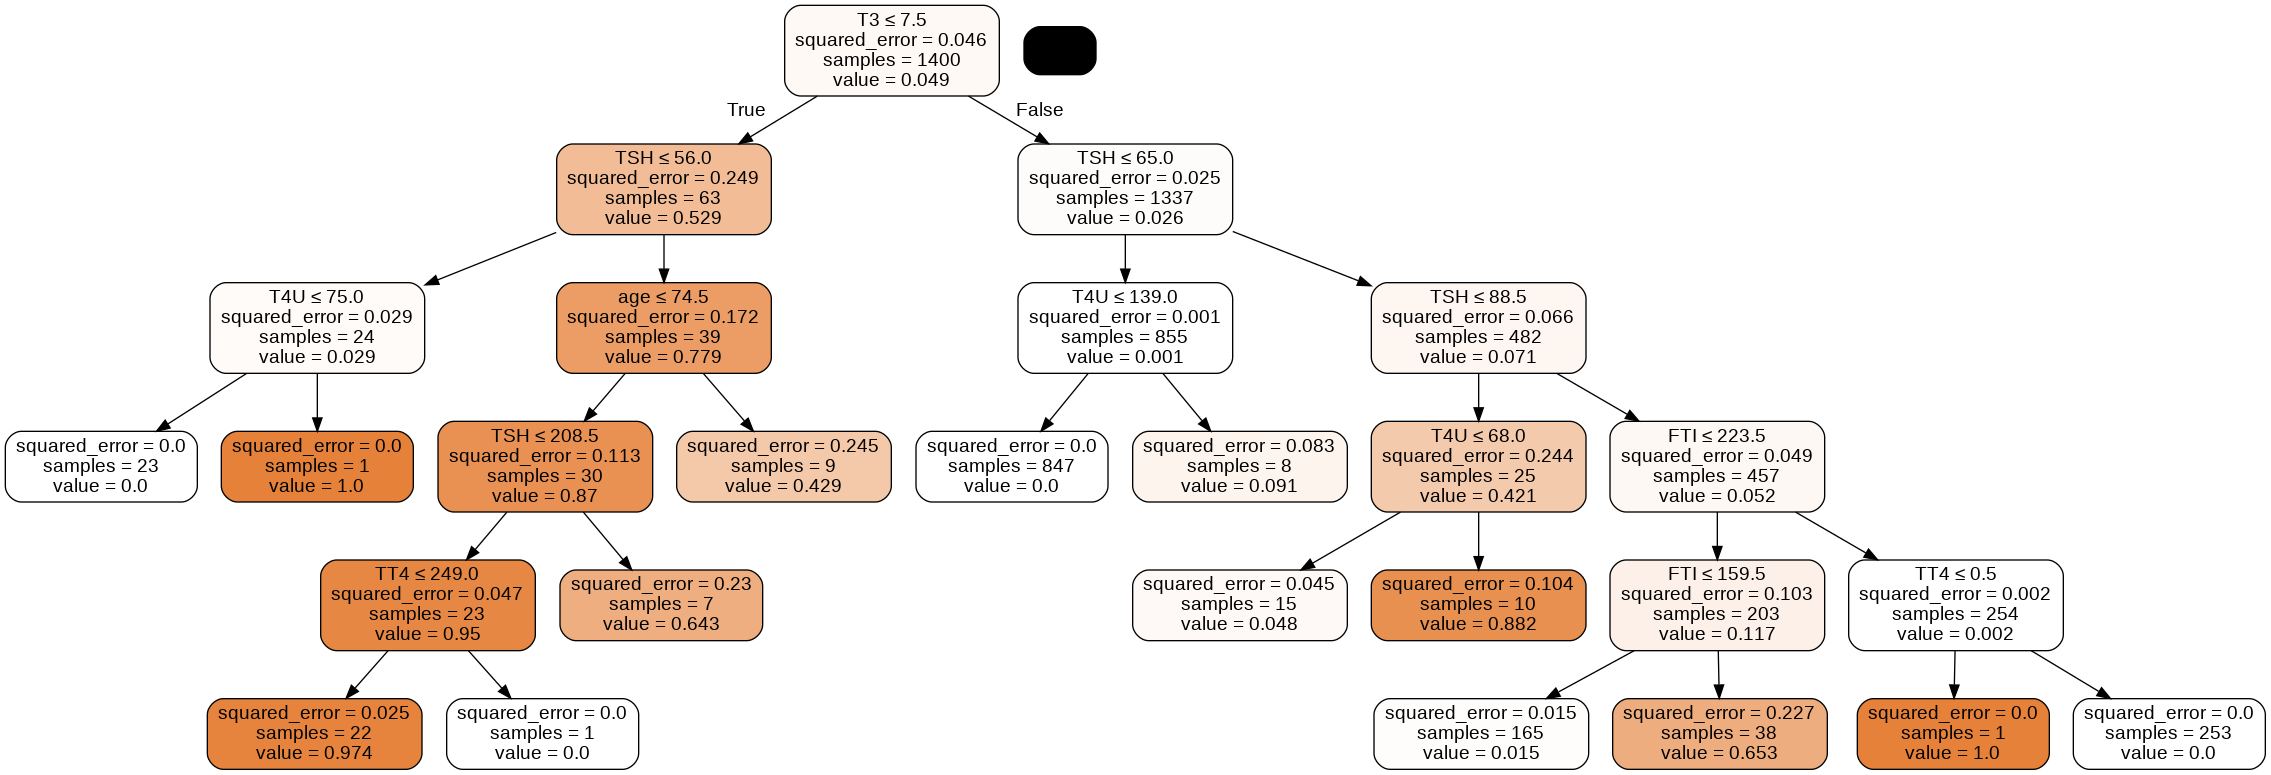

In [54]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

## Feature Importance

In [55]:
X.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [56]:
# Checking for the most important features that contribute most in predicting the target
# Create a dataframe of features and their respective importances

col = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
imp_df = pd.DataFrame({'feature': np.array(col), 'importance': np.round(forest.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
imp_df

,importance
feature,
T3,0.3099
FTI,0.2204
TSH,0.1996
T4U,0.1402
TT4,0.1115
age,0.0072
on_thyroxine,0.0027
sick,0.0026
query_hypothyroid,0.0023


In [57]:
imp_df = imp_df[:10].sort_values(by = 'importance', ascending = False)

imp_df

,importance
feature,
T3,0.3099
FTI,0.2204
TSH,0.1996
T4U,0.1402
TT4,0.1115
age,0.0072
on_thyroxine,0.0027
sick,0.0026
query_hypothyroid,0.0023


## Remodeling

In [58]:
thy['sick'].unique()

array([0, 1])

In [59]:
thyroid['sick'].unique()

array(['f', 't'], dtype=object)

In [60]:
# assigning X to the important features and the y variable
X = X[['FTI','T3','TSH','T4U','age','sick','TSH_measured','query_hypothyroid','on_thyroxine']]

y = np.where(thy.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [61]:
# Instantiating the model
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_test)

In [62]:
# Measuring the accuracy of the model
ac_score = accuracy_score(y_test, y_pred)
# displaying result
print('Accuracy score: ', ac_score)




Accuracy score:  1.0


In [63]:
# printing out the classification report
rep = classification_report(y_test, y_pred)
print('Classification Report: ', rep)


Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       949

    accuracy                           1.00       949
   macro avg       1.00      1.00      1.00       949
weighted avg       1.00      1.00      1.00       949



In [64]:
# getting the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', matrix)

Confusion Matrix:  [[949]]


## Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.02, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

In [66]:
# evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


## Ada Boosting

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# adaboost requires a simple decision tree in its builder
# we'll also tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

In [68]:
# evaluating the adaboost model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


**Observation**
* The two boosting mechanisms seem to be highly effective since the errors are all at zero for both gradient and ada boosting

# Support Vector Classifier

In [69]:
thy['status'] = thy['status'].astype('category')

In [70]:
# checking the datatypes
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   category
 1   age                        3163 non-null   int64   
 2   sex                        3163 non-null   int64   
 3   on_thyroxine               3163 non-null   int64   
 4   query_on_thyroxine         3163 non-null   int64   
 5   on_antithyroid_medication  3163 non-null   int64   
 6   thyroid_surgery            3163 non-null   int64   
 7   query_hypothyroid          3163 non-null   int64   
 8   query_hyperthyroid         3163 non-null   int64   
 9   pregnant                   3163 non-null   int64   
 10  sick                       3163 non-null   int64   
 11  tumor                      3163 non-null   int64   
 12  lithium                    3163 non-null   int64   
 13  goitre                     3163 n

In [71]:
# previewing the top 5 important features
imp_df.head()

,importance
feature,
T3,0.3099
FTI,0.2204
TSH,0.1996
T4U,0.1402
TT4,0.1115


In [72]:
# basing our X in the two most important features
X = thy[['FTI', 'T3']].values
X.shape

(3163, 2)

In [73]:
# assigning the tatus column to y
y = thy[['status']]
y.shape

(3163, 1)

In [74]:
# reconverting the datatype to int
y=y.astype('int')

In [75]:
# flattening y
y = np.array(y)
y.flatten()

array([1, 1, 1, ..., 0, 0, 0])

In [76]:
# splitting 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42, stratify = y)

## Polynormial

In [77]:
from sklearn.svm import SVC

# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [78]:
# Making a prediction
y_pred_pc = polyclassifier.predict(X_test)

In [83]:
# Evaluating the model
print( accuracy_score(y_test, y_pred_pc))
print(f1_score(y_test,y_pred_pc))


0.9525816649104321
0.0


## Radial Basis Function

In [82]:
# Building the rbf model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making a prediction
y_pred_rbf = rbfclassifier.predict(X_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred_rbf))
print(f1_score(y_test,y_pred_rbf))


0.9525816649104321
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Sigmoid Function

In [81]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

# making prediction
y_pred_sig = sigclassifier.predict(X_test)
# evaluation
print(accuracy_score(y_test,y_pred_sig))
print(f1_score(y_test,y_pred_sig))

0.9557428872497366
0.15999999999999998


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Conclusion

The sigmoid function performed best at 95.57%.
* It's f1 score is also not at zero so that suggests the  model is way better than the polynomial and radial basis function.
* An F1 score is considered perfect when it's 1 , while the model is a total failure when it's 0. 
* Polynomial and radial bais function scored an accuracy of 95.25 while their f1 score was 0